In [154]:
import pandas as pd
import numpy as np
from IPython.display import display, Markdown, Latex, HTML
labels_opt = ['(svm)_opt','(knn)_opt','(mlp)_opt','(mnb)_opt','(rf)_opt']
labels = ['(svm)','(knn)','(mlp)','(mnb)','(rf)']

Single classifier results using default parameters. Averaged over 3 runs.
Columns: algs,dataset,weighted,accuracy,precision,recall,fscore,cv_mean,cv_std,runtime


In [155]:
df_def = pd.read_csv('../results/res.csv')
res = df_def.drop(['weighted','optimized'], axis=1).loc[df_def['algs'].isin(labels)].groupby(['algs']).mean()
display(HTML(res.to_html()))

,accuracy,precision,recall,fscore,cv_mean,cv_std,runtime
algs,,,,,,,
(knn),0.740000,0.681176,0.670392,0.667647,0.775882,0.030588,0.113922
(mlp),0.791961,0.735882,0.721569,0.716667,0.775490,0.029020,0.812157
(mnb),0.680588,0.539020,0.563137,0.524902,0.774510,0.031176,0.041961
(rf),0.811373,0.779608,0.757451,0.759020,0.777451,0.030588,0.133137
(svm),0.724510,0.628235,0.616667,0.604902,0.777059,0.031176,0.253922


In [7]:
res = df_def.drop(['weighted','optimized'], axis=1)
        .loc[df_def['algs'].isin(labels)]
        .groupby(['algs', 'dataset'])
        .mean()
display(HTML(res.to_html()))

IndentationError: unexpected indent (<ipython-input-7-24101a0b78a9>, line 2)

All combinations of 3 (total of 10) and 5 (total of 1) classifiers for ensemble. Default parameters, run on all datasets. Non-weighted.

In [45]:
res = df_def.drop(['weighted','optimized','recall','fscore','cv_mean','runtime','precision','accuracy'], axis=1).groupby(['algs']).mean().sort_values('cv_std',ascending=False).head(10)
display(HTML(res.to_html()))

,cv_std
algs,
(mnb_rf_mlp)_w_opt,0.035455
(svm_knn_mlp)_w,0.033913
(svm_rf_mlp)_w_opt,0.033478
(svm_knn_mnb_rf_mlp)_w,0.033182
(svm_knn_mlp)_w_opt,0.033043
(knn_rf_mlp)_w_opt,0.032727
(svm_mnb_rf)_w,0.032609
(mnb),0.032609
(svm)_opt,0.032174


All combinations of 3 (total of 10) and 5 (total of 1) classifiers for ensemble. Default parameters, run on all datasets. Weighted.

In [4]:
res = df_def.loc[~df_def['algs'].isin(labels)].loc[df_def['weighted'] == True].groupby(['algs', 'dataset']).mean()
display(HTML(res.to_html()))

In [ ]:
res = df_def.loc[~df_def['optimized'] == True].loc[df_def['weighted'] == True].groupby(['algs', 'dataset']).mean()
display(HTML(res.to_html()))

Performance of classifiers and ensembles averaged over all datasets.

In [7]:
res = df_def.groupby(['algs', 'weighted']).mean().sort_values(df_def.columns[3])
display(HTML(res.to_html()))

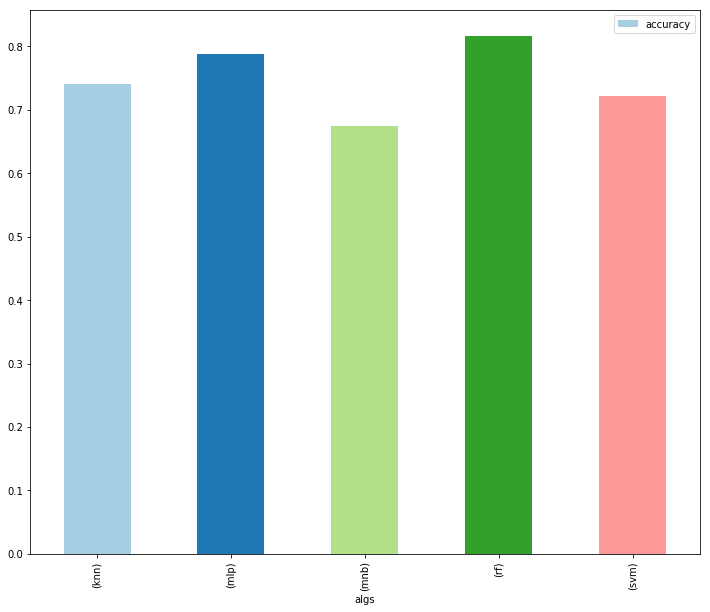

In [93]:
import matplotlib.pyplot as plt
%matplotlib inline
#Single best performing
df_red = df_def.drop(['weighted','optimized','recall','fscore','cv_std','cv_mean','dataset','precision','runtime'], axis=1).loc[df_def['algs'].isin(labels)]
df_red.groupby('algs').mean().plot(figsize=(12,10),kind='bar',color=[plt.cm.Paired(np.arange(len(df_red)))])
#df_redw = df_red.loc[df_def['weighted']==True].groupby(['algs']).mean()
#df_redwo = df_red.loc[df_def['weighted']==False].groupby(['algs']).mean()
#df_redw.plot(figsize=(12,10))
plt.savefig('../plots/single_bar.png')

0.8054031612645057

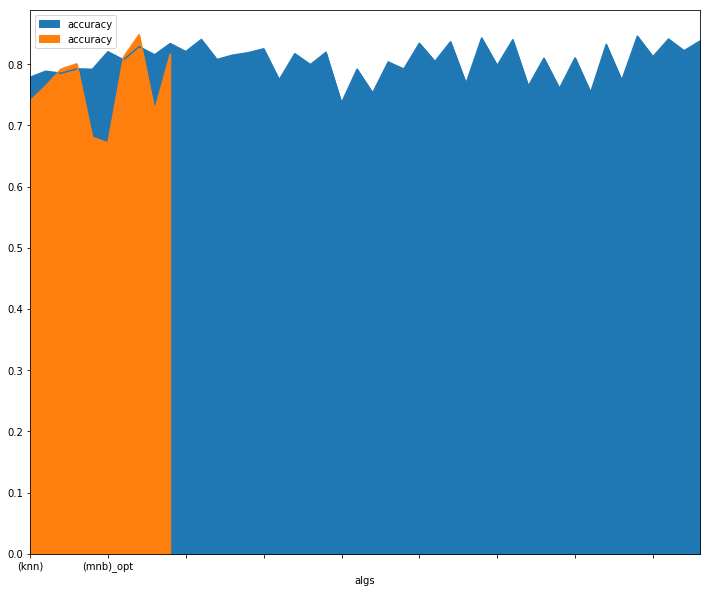

In [160]:
df_red = df_def.drop(['weighted','optimized','recall','fscore','cv_std','cv_mean','dataset','precision','runtime'], axis=1)
dfs = df_red.loc[df_def['algs'].isin(labels+labels_opt)].groupby(['algs']).mean()
dfe = df_red.loc[~df_def['algs'].isin(labels+labels_opt)].groupby(['algs']).mean()
ax=dfe.plot.area(label='ensemble')
dfs.plot.area(label='single',stacked=True,ax=ax,figsize=(12,10))
#df_red.groupby('algs').mean().plot(figsize=(12,10),kind='bar',color=[plt.cm.Paired(np.arange(len(df_red)))])
plt.savefig('../plots/singleVSensemble.png')
dfs['accuracy'].mean()
dfe['accuracy'].mean()


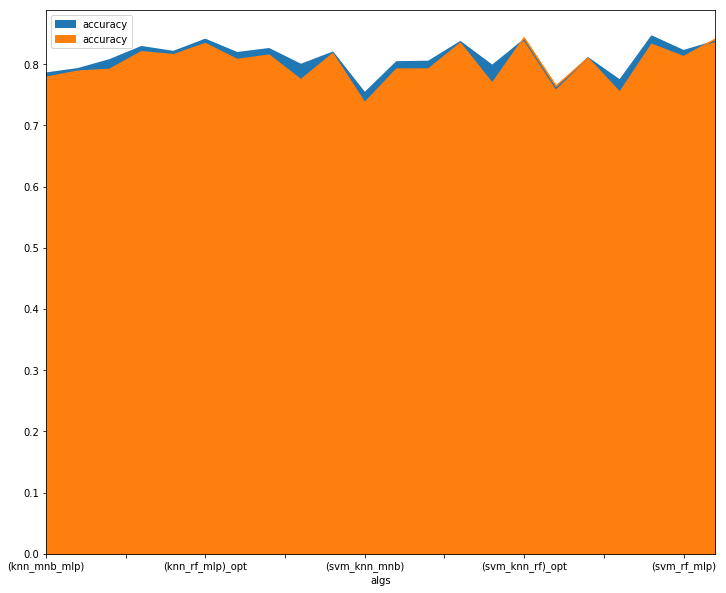

In [157]:
df_red = df_def.drop(['weighted','optimized','recall','fscore','cv_std','cv_mean','dataset','precision','runtime'], axis=1)
dfnw = df_red.loc[~df_def['algs'].isin(labels+labels_opt)].loc[df_def['weighted']==True].groupby(['algs']).mean()
dfw = df_red.loc[~df_def['algs'].isin(labels+labels_opt)].loc[df_def['weighted']==False].groupby(['algs']).mean()
ax=dfnw.plot.area(label='ensemble')
dfw.plot.area(label='single',stacked=True,ax=ax,figsize=(12,10))
#df_red.groupby('algs').mean().plot(figsize=(12,10),kind='bar',color=[plt.cm.Paired(np.arange(len(df_red)))])
plt.savefig('../plots/weightVSnoWeight.png')

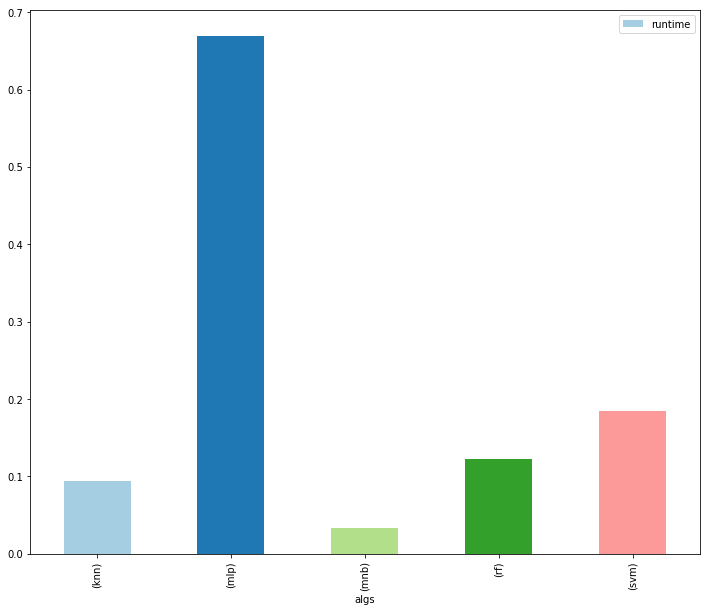

In [153]:
from itertools import cycle, islice
m1 = dfs['accuracy'].mean()
m2 = dfe['accuracy'].mean()

import matplotlib.pyplot as plt
%matplotlib inline
#Single best performing
df_red = df_def.drop(['weighted','optimized','recall','fscore','cv_std','cv_mean','dataset','precision','accuracy'], axis=1).loc[df_def['algs'].isin(labels)]
df_red.groupby('algs').mean().plot(figsize=(12,10),kind='bar',color=[plt.cm.Paired(np.arange(len(df_red)))])
#df_redw = df_red.loc[df_def['weighted']==True].groupby(['algs']).mean()
#df_redwo = df_red.loc[df_def['weighted']==False].groupby(['algs']).mean()
#df_redw.plot(figsize=(12,10))
plt.savefig('../plots/single_runtimes.png')

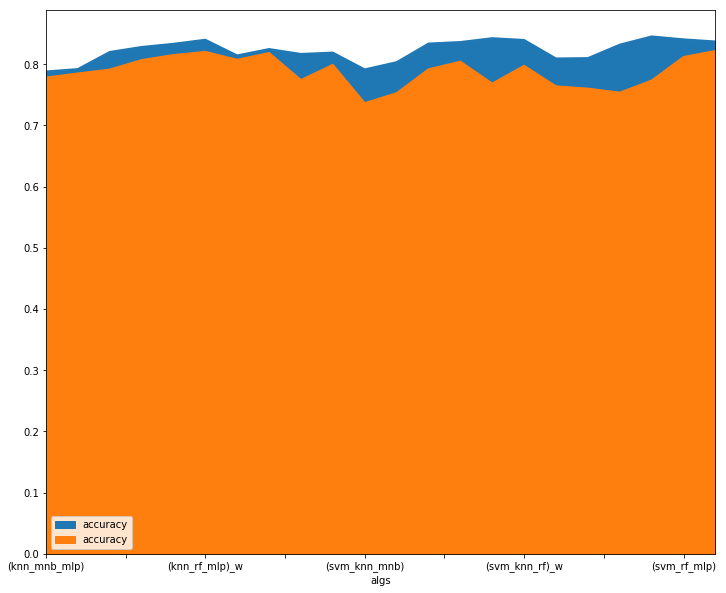

In [161]:
df_red = df_def.drop(['weighted','optimized','recall','fscore','cv_std','cv_mean','dataset','precision','runtime'], axis=1)
dfnw = df_red.loc[~df_def['algs'].isin(labels+labels_opt)].loc[df_def['optimized']==True].groupby(['algs']).mean()
dfw = df_red.loc[~df_def['algs'].isin(labels+labels_opt)].loc[df_def['optimized']==False].groupby(['algs']).mean()
ax=dfnw.plot.area(label='ensemble')
dfw.plot.area(label='single',stacked=True,ax=ax,figsize=(12,10))
#df_red.groupby('algs').mean().plot(figsize=(12,10),kind='bar',color=[plt.cm.Paired(np.arange(len(df_red)))])
plt.savefig('../plots/OptVSnoOpt.png')